In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import xgboost as xgb
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

### to classification

In [2]:
data=pd.read_csv('transformed_data.csv')

<Axes: xlabel='LogReturn', ylabel='Count'>

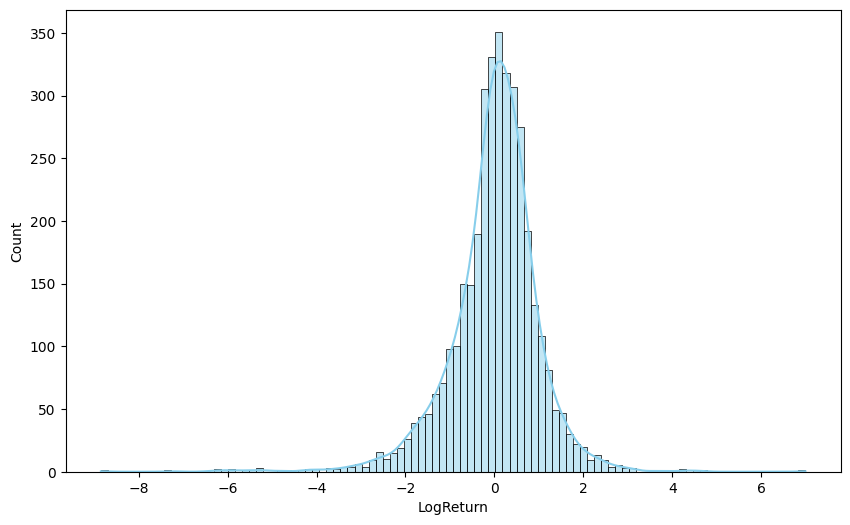

In [3]:
plt.figure(figsize=(10, 6))
sns.histplot(data['LogReturn'], bins=100, kde=True, color='skyblue')

In [4]:
data_class=data.copy()
data_class['LogReturn']=(data['LogReturn'] > 0).astype(int)

### Train test

In [5]:
data_class['date']=pd.to_datetime(data_class['date'])

In [6]:
data_class = data_class.loc[data_class['date'].dt.year < 2019]

In [7]:
X=data_class.drop(['LogReturn','date'],axis=1)
Y=data_class['LogReturn']

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)

In [9]:
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

Accuracy: 79.14%


In [10]:
X.columns

Index(['gdp', 'interest_rate', 'unemployment', 'cpi', 'pce',
       'nonfarm_payrolls', 'corporate_profits', 'money_supply',
       'consumer_confidence', 'housing_starts', 'permits',
       'interest_rate_lag1', 'unemployment_lag1', 'cpi_lag1', 'pce_lag1',
       'interest_rate_roll3_mean', 'interest_rate_roll3_std', 'cpi_roll3_mean',
       'cpi_roll3_std', 'interest_x_cpi', 'unemp_x_gdp', 'month_sin',
       'month_cos', 'dayofweek_sin', 'dayofweek_cos', 'dayofmonth_sin',
       'dayofmonth_cos', 'dayofyear_sin', 'dayofyear_cos', 'MA10', 'MA50',
       'RSI', 'LogReturn_lag1', 'LogReturn_lag2', 'LogReturn_lag3',
       'LogReturn_lag4', 'LogReturn_lag5', 'LogReturn_lag6', 'LogReturn_lag7',
       'LogReturn_lag8', 'LogReturn_lag9', 'LogReturn_lag10'],
      dtype='object')

In [11]:
# Feature importances
importance = model.feature_importances_

# Zamień na tabelkę
feat_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

# Posortuj od najważniejszych
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

print(feat_importance)

                     Feature  Importance
32            LogReturn_lag1    0.150064
5           nonfarm_payrolls    0.103524
12         unemployment_lag1    0.052514
22                 month_cos    0.037399
36            LogReturn_lag5    0.036641
37            LogReturn_lag6    0.028742
16   interest_rate_roll3_std    0.026819
8        consumer_confidence    0.024380
0                        gdp    0.022938
6          corporate_profits    0.021684
30                      MA50    0.021627
1              interest_rate    0.020988
11        interest_rate_lag1    0.020669
23             dayofweek_sin    0.020595
4                        pce    0.019442
31                       RSI    0.019358
2               unemployment    0.019280
33            LogReturn_lag2    0.019278
18             cpi_roll3_std    0.019165
27             dayofyear_sin    0.019030
20               unemp_x_gdp    0.018972
38            LogReturn_lag7    0.018929
28             dayofyear_cos    0.018545
25            da

### NEW MODEL

In [12]:
q1 = data['LogReturn'].quantile(0.25)
q2 = data['LogReturn'].quantile(0.50)  # Mediana
q3 = data['LogReturn'].quantile(0.75)

# Tworzymy nowe kolumny klasyfikacji na podstawie kwartyli
def classify_log_return(row):
    if row['LogReturn'] <= q1:
        return 0  # Klasa 0 - pierwszy kwartyl
    elif row['LogReturn'] <= q2:
        return 1  # Klasa 1 - drugi kwartyl
    elif row['LogReturn'] <= q3:
        return 2  # Klasa 2 - trzeci kwartyl
    else:
        return 3  # Klasa 3 - czwarty kwartyl

# Przypisanie klas do danych
data_class4=data.copy()
data_class4['LogReturn'] = data_class4.apply(classify_log_return, axis=1)

# Zobaczmy wyniki
print(data_class4['LogReturn'].head())

0    2
1    2
2    2
3    3
4    3
Name: LogReturn, dtype: int64


In [13]:
data_class4['date']=pd.to_datetime(data_class4['date'])
data_class4 = data_class4.loc[data_class4['date'].dt.year < 2019]
X=data_class4.drop(['LogReturn','date'],axis=1)
Y=data_class4['LogReturn']
X_train, X_test, y_train, y_test = train_test_split(X, Y, test_size=0.2, random_state=42)
model = xgb.XGBClassifier()
model.fit(X_train, y_train)
y_pred = model.predict(X_test)
accuracy = accuracy_score(y_test, y_pred)
print(f"Accuracy: {accuracy * 100:.2f}%")

# Feature importances
importance = model.feature_importances_

# Zamień na tabelkę
feat_importance = pd.DataFrame({
    'Feature': X_train.columns,
    'Importance': importance
})

# Posortuj od najważniejszych
feat_importance = feat_importance.sort_values(by='Importance', ascending=False)

print(feat_importance)

Accuracy: 57.82%
                     Feature  Importance
32            LogReturn_lag1    0.137919
36            LogReturn_lag5    0.036789
17            cpi_roll3_mean    0.033464
20               unemp_x_gdp    0.031438
14                  pce_lag1    0.029926
37            LogReturn_lag6    0.028815
3                        cpi    0.027077
2               unemployment    0.026603
10                   permits    0.024712
41           LogReturn_lag10    0.023576
27             dayofyear_sin    0.023472
8        consumer_confidence    0.023210
0                        gdp    0.023201
6          corporate_profits    0.022567
28             dayofyear_cos    0.022540
5           nonfarm_payrolls    0.022376
33            LogReturn_lag2    0.021907
34            LogReturn_lag3    0.021588
40            LogReturn_lag9    0.021540
30                      MA50    0.020773
18             cpi_roll3_std    0.020741
25            dayofmonth_sin    0.020653
15  interest_rate_roll3_mean    0.020216